In [6]:
#Checking version of python and libraries being used
import sys
print ("Python: {}".format(sys.version))
import scipy
print ("Scipy: {}".format(scipy.__version__))
import numpy
print ("Numpy: {}".format( numpy.__version__))
import pandas
print ("Pandas: {}".format( pandas.__version__))
import matplotlib
print ("Matplotlib: {}".format(  matplotlib.__version__))
import sklearn
print ("Sklearn: {}".format( sklearn.__version__))

Python: 2.7.16 |Anaconda, Inc.| (default, Mar 14 2019, 15:42:17) [MSC v.1500 64 bit (AMD64)]
Scipy: 1.2.1
Numpy: 1.16.5
Pandas: 0.24.2
Matplotlib: 2.2.3
Sklearn: 0.20.3


In [7]:
# Importing dependencies
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [12]:
# Loading the data
dataset = read_csv("iris.csv", names = names)
names = ['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width', 'Class']

In [13]:
# Looking at the dimensions of the dataset
print(dataset.shape)

(150, 5)


In [14]:
# Examining the data
print(dataset.head(20))

    Sepal-length  Sepal-width  Petal-length  Petal-width        Class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [15]:
# Viewing the statistical summary of the data
print(dataset.describe())

       Sepal-length  Sepal-width  Petal-length  Petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [17]:
# Viewing rhe class distribution of the data
print(dataset.groupby('Class').size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


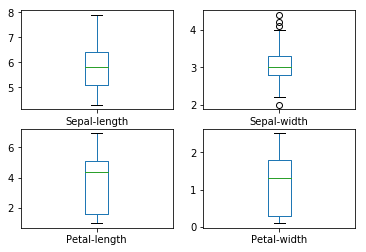

In [18]:
# Univariate plots of the data - Box and whisker plot
dataset.plot(kind = 'box', subplots = True, layout = (2, 2), sharex = False, sharey = False)
pyplot.show()

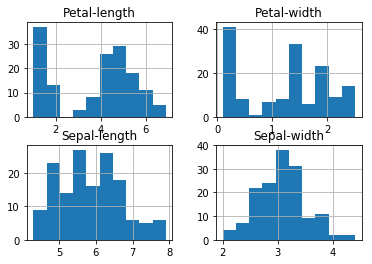

In [20]:
# Univariate plots of the data - Histogram
dataset.hist()
pyplot.show()

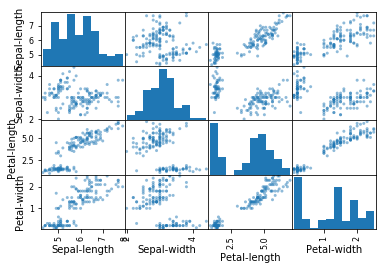

In [21]:
# Multivariate plots of the data - Scatter plot
scatter_matrix(dataset)
pyplot.show()

In [23]:
# Creating a validation set
# Splitting the dataset
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [27]:
# Training the model with different alogorithms

# Logistic Regression
# Linear Discriminant Analysis
# K-Nearest Neighbors
# Classification and Regression
# Gauusian Naive-Bayes
# Support Vector Machines

# Building the models
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))

In [29]:
# Evaluating each model
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 1)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print ('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


<function matplotlib.pyplot.show>

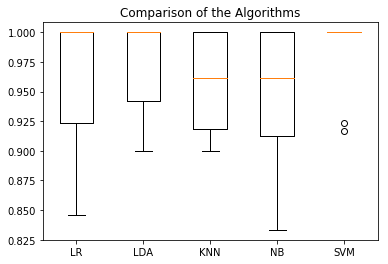

In [32]:
# Comparing the models
pyplot.boxplot(results, labels = names)
pyplot.title("Comparison of the Algorithms")
pyplot.show

In [33]:
# Making predictions on SVM (best model out of the six)
model = SVC(gamma = 'auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [34]:
# Evaluating the predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

